#Paquetes necesarios

Podremos hacer uso del mismo *environment* de la primera práctica, aunque en ocasiones pedirá instalar Pillow

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
img = cv2.imread('mandril.jpg') 

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

El valor máximo de píxeles blancos por filas serían 220

Filas con un número de píxeles blancos mayor o igual que 0.90*maxfil(198.0):
203 píxeles en la fila 6
220 píxeles en la fila 12
204 píxeles en la fila 15
200 píxeles en la fila 20
201 píxeles en la fila 21
199 píxeles en la fila 88
212 píxeles en la fila 100


(0.0, 512.0)

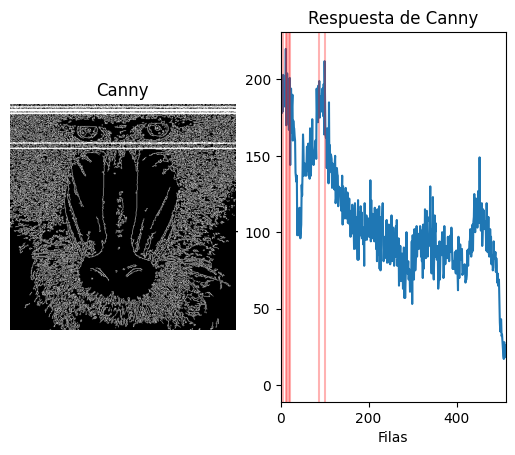

In [2]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)

#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, segundo valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * canny.shape[1])

#Normaliza en base al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows_pixels = row_counts[:, 0] // 255
max_rows = []

print("El valor máximo de píxeles blancos por filas serían", max(rows_pixels))
print("\nFilas con un número de píxeles blancos mayor o igual que 0.90*maxfil(%.1f):" % (max(rows_pixels)*0.9))

for i in range(0, len(row_counts), 1):
    if(rows_pixels[i] >= max(rows_pixels)*0.9):
        print(rows_pixels[i], "píxeles en la fila", i)
        max_rows.append(i)

# Copia la imagen y marca las filas detectadas
canny_mod = canny.copy()
for row in max_rows:
    cv2.line(canny_mod, (0, row), (canny_mod.shape[1], row), (255, 255, 255), 2)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny_mod, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_pixels)
for row in max_rows:
    plt.axline((row,0),(row,max(rows_pixels)),color=(1,0,0,0.3))
#Rango en x definido por las filas
plt.xlim([0, canny_mod.shape[0]])

In [3]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a byte con openCV
sobel8 = cv2.convertScaleAbs(sobel)

#Define valor umbral
valorUmbral = 130
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

El valor máximo de píxeles blancos por columnas serían 179

Columnas con un número de píxeles blancos mayor o igual que 0.90*maxcol(161.1):
179 píxeles en la columna 288


(0.0, 512.0)

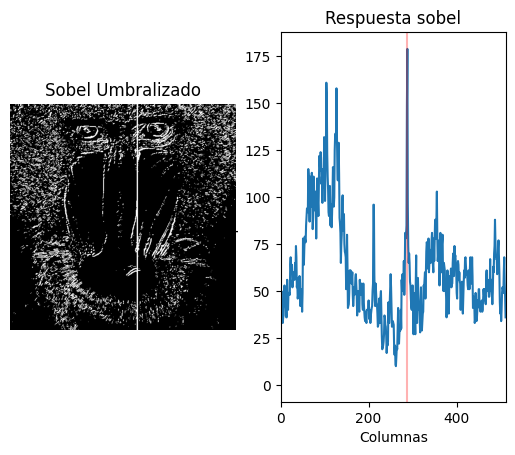

In [4]:
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])

#Normaliza en base al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols_pixels = col_counts[0] // 255
max_cols = []

print("El valor máximo de píxeles blancos por columnas serían", max(cols_pixels))
print("\nColumnas con un número de píxeles blancos mayor o igual que 0.90*maxcol(%.1f):" % (max(cols_pixels)*0.9))
for i, value in enumerate(cols_pixels):
    if(value >= max(cols_pixels)*0.9):
        print(value, "píxeles en la columna", i)
        max_cols.append(i)

# Copia la imagen y marca las columnas detectadas
umbralizada_mod = imagenUmbralizada.copy()
for col in max_cols:
    cv2.line(umbralizada_mod, (col, 0), (col, umbralizada_mod.shape[1]), (255, 255, 255), 2)
    
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel Umbralizado")
plt.imshow(umbralizada_mod, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols_pixels)
for col in max_cols:
    plt.axline((col,0),(col,max(cols_pixels)),color=(1,0,0,0.3))
#Rango en x definido por las columnas
plt.xlim([0, umbralizada_mod.shape[1]])

El valor máximo de píxeles blancos por filas serían 161

Filas con un número de píxeles blancos mayor o igual que 0.90*maxfil(144.9):
155 píxeles en la fila 3
149 píxeles en la fila 4
149 píxeles en la fila 20
151 píxeles en la fila 51
152 píxeles en la fila 81
161 píxeles en la fila 82
154 píxeles en la fila 83


(0.0, 512.0)

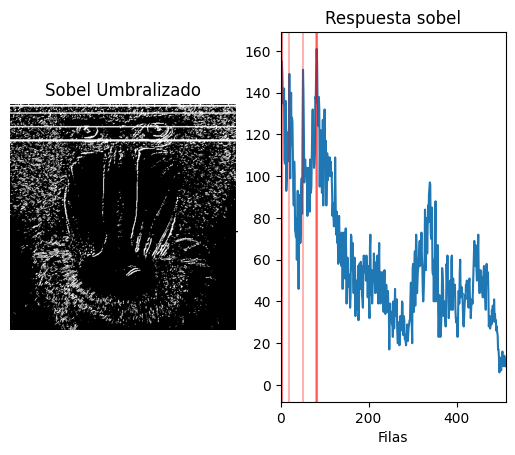

In [5]:
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[:, 0] / (255 * imagenUmbralizada.shape[1])

rows_pixels = row_counts[:, 0] // 255
max_rows = []

print("El valor máximo de píxeles blancos por filas serían", max(rows_pixels))
print("\nFilas con un número de píxeles blancos mayor o igual que 0.90*maxfil(%.1f):" % (max(rows_pixels)*0.9))

for i in range(0, len(row_counts), 1):
    if(rows_pixels[i] >= max(rows_pixels)*0.9):
        print(rows_pixels[i], "píxeles en la fila", i)
        max_rows.append(i)

# Copia la imagen y marca las filas detectadas
umbralizada_mod = imagenUmbralizada.copy()
for row in max_rows:
    cv2.line(umbralizada_mod, (0, row), (umbralizada_mod.shape[1], row), (255, 255, 255), 2)

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel Umbralizado")
plt.imshow(umbralizada_mod, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows_pixels)
for row in max_rows:
    plt.axline((row,0),(row,max(rows_pixels)),color=(1,0,0,0.3))
#Rango en x definido por las filas
plt.xlim([0, umbralizada_mod.shape[0]])


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [ ]:
vid = cv2.VideoCapture(0)

mode = 0
#Define valor umbral
valorUmbral = 130

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Copiamos el frame original
        frame_mod = frame.copy()

        #Conversión de la imagen a niveles de grises de la imagen original en BGR
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        if mode == 0: # Modo imagen original
            pass

        elif mode == 1: # Modo umbralizado
            #Obtiene imagen umbralizada para dicho valor definido
            _, frame_mod = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)

        elif mode == 2: # Modo detección de bordes con Sobel
            # Gaussiana para suavizar la imagen original, eliminando altas frecuencias
            ggris = cv2.GaussianBlur(gris, (3, 3), 0)

            #Calcula en ambas direcciones (horizontal y vertical)
            sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
            sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
            #Combina ambos resultados
            sobel = cv2.add(sobelx, sobely)

            # Conversión a byte con numpy
            frame_mod = np.uint8(np.abs(sobel))
        
        # Mostramos la imagen
        cv2.imshow('', frame_mod)
  
    
    k = cv2.waitKey(20)
    if k == 27: # Detener pulsado ESC
        break
    elif k == 32: # Cambiar de modo pulando espacio
        mode += 1
        if mode >= 3:
            mode = 0

    elif k == ord('d'): # Aumenta umbral
        valorUmbral += 5
        valorUmbral = min(valorUmbral, 255)

    elif k == ord('a'): # Reduce umbral
        valorUmbral -= 5
        valorUmbral = max(valorUmbral, 0)

        
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
# Imagen completamente estable y detectar pixel/región con mayor movimiento y destacarla con un círculo?? además de sonar una alarma al detectar movimiento
# Detector de umbral de cierto movimiento para alarmar de okupas

vid = cv2.VideoCapture(0)

# Fondo: mezcla de gaussianas con detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(
    history=100, varThreshold=50, detectShadows=True
)
  
while True:      
    # Captura fotograma a fotograma
    ret, frame = vid.read()

    if not ret:
        break

    # Efecto espejo
    framem = cv2.flip(frame, 1)

    # Aplica sustracción de fondo
    objetos = eliminadorFondo.apply(framem)

    # Obtiene fondo estimado
    background = eliminadorFondo.getBackgroundImage()
    
    # ---- CREAR OVERLAY ROJO Y WARNING ----
    overlay = framem.copy()

    # Dibuja en rojo donde hay movimiento
    overlay[objetos > 0] = (0, 0, 255)  # píxeles en rojo

    # Mezcla overlay con la imagen original (0.3 = transparencia)
    framem = cv2.addWeighted(overlay, 0.5, framem, 0.5, 0)
    
    contours, _ = cv2.findContours(objetos, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        # Tomar el contorno más grande
        max_contour = max(contours, key=cv2.contourArea)
        if cv2.contourArea(max_contour) > 500:  # ignorar ruido pequeño

            # Texto de alerta
            cv2.putText(framem, "WARNING: Movimiento detectado", (50, 50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
            
    # ---- DETECCIÓN DE COLOR VERDE ----
    hsv = cv2.cvtColor(framem, cv2.COLOR_BGR2HSV)

    # Rango típico de verde en HSV
    lower_green = np.array([35, 40, 40])
    upper_green = np.array([85, 255, 255])

    mask_green = cv2.inRange(hsv, lower_green, upper_green)

    # Contornos del verde
    green_contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if green_contours:
        max_green = max(green_contours, key=cv2.contourArea)
        if cv2.contourArea(max_green) > 500:  # evitar ruido
            cv2.putText(framem, "WARNING: Color VERDE detectado",
                        (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)

    # Mostrar vídeo original
    cv2.imshow('Video normal', framem)

    # Mostrar máscara de movimiento
    cv2.imshow('Detector de movimiento', objetos)

    # Mostrar fondo aprendido
    #if background is not None:
        #cv2.imshow('Fondo', background)
   
    # ESC para salir
    if cv2.waitKey(20) == 27:
        break
  
# Libera captura
vid.release()
cv2.destroyAllWindows()
